## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#calculate total number of rows and columns
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# nunique function helps to calculate total number of unique values.
total_users=df['user_id'].nunique()
total_users

290584

d. The proportion of users converted.

In [5]:
#calculating proportion of converted users.
users_converted= (df.query('converted == 1')['user_id'].nunique())
prop = (users_converted/total_users)
print(prop*100,'%')

12.104245244060237 %


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# calculating number of rows of new_page and treatment not lining up together.
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [7]:
# calculating total number of null values in the dataframe
# Result should be False
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-14 02:55:59.590927')].index)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
users_converted2 = (df2.query('converted == 1')['user_id'].nunique())
prop2 = users_converted2/float(df2.shape[0])
print(prop2*100,'%')

11.959708724499627 %


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_users_converted = (df2.query('converted == 1 and group == "control"')['user_id'].nunique())
control_users =float(df2.query('group == "control"')['user_id'].nunique())
prop_control_conv = control_users_converted / control_users
print(prop_control_conv*100,'%')

12.03863045004612 %


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treat_users_converted = (df2.query('converted == 1 and group == "treatment"')['user_id'].nunique())
treat_users =float(df2.query('group == "treatment"')['user_id'].nunique())
prop_treat_conv = treat_users_converted / treat_users
print(prop_treat_conv*100,'%')

11.880806551510565 %


d. What is the probability that an individual received the new page?

In [17]:
new_page_count = (df2.query('landing_page == "new_page"')['user_id'].nunique())
prop3 = new_page_count/float(df2.shape[0])
print(prop3*100,'%')

50.00619442226688 %


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The probability of an individual converting regardless of the page they receive 11.96%. And, the probability of individual converting in group "Control" is 12.04%. And, the probability of individual converting in group "treatment" is 11.88%. And, the probability of idividual receiving a new page is 50% regardless of his/her group type.**

**Since the result of converted individuals in both groups "Control" and "Treatment" are equal. Thus, there is no evidence to say the treatment page leads to more conversion.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Since the question is associated with a direction, in this case assuming old page is better unless the new page proves to be better at Type I error of 5%. We should use the following hypothesis:**
- "NULL" H0: p_new - p_old <=0
- "ALTERNATIVE" H1: p_new - p_old >0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# Calculate converted success new rate for null hypotheses, regardless of what is the page
conv_succ_null_new = df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()
conv_succ_null_new 

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# Calculate converted success old rate for null hypotheses, regardless of what is the page
conv_succ_null_old = df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()
conv_succ_null_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
#calculate number of unique users who has "New page"
new_n = df2.query('landing_page == "new_page"')['user_id'].nunique()
new_n

145310

d. What is $n_{old}$?

In [21]:
#calculate number of unique users who has "Old page"
old_n = df2.query('landing_page == "old_page"')['user_id'].nunique()
old_n

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#Simulate new_n transactions with convert rate of p_new. Using numpy random.choice function to to give us random simulation.
new_page_converted = np.random.choice([0,1],new_n, p=(conv_succ_null_new,1-conv_succ_null_new))
print(new_page_converted)

[1 1 1 ... 1 1 1]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#Simulate old_n transactions with convert rate of p_old. Using numpy random.choice function to to give us random simulation.
old_page_converted = np.random.choice([0,1],old_n, p=(conv_succ_null_old,1-conv_succ_null_old))
print(old_page_converted)

[1 1 1 ... 1 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# since the result of old/new page convereted is a list, we will find the difference by find the mean in each one. 
# then substract the new_page_converted by old_page_converted
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-7.345008361803185e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
# Create random sampling to find difference in conversion rates among old and new page.
# boostrapping function should help us with this task. 
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1],new_n, p=(conv_succ_null_new,1-conv_succ_null_new))
    old_page_converted = np.random.choice([0,1],old_n, p=(conv_succ_null_old,1-conv_succ_null_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

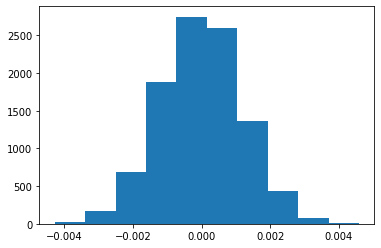

In [26]:
# to plot the histogram of p_diffs we need to convert it to Numpy array
p_diffs = np.array(p_diffs)
#histogram
plt.hist(p_diffs);

In [27]:
# calculate total number of unique converted users for new page
new_converted = df2.query('converted == 1 and landing_page == "new_page"').user_id.nunique()

# conversion rate for new page
new_conv_rate = new_converted / new_n

new_conv_rate

0.11880806551510564

In [28]:
# calculate total number of unique converted users for new page
old_converted = df2.query('converted == 1 and landing_page == "old_page"').user_id.nunique()

# conversion rate for new page
old_conv_rate = old_converted / old_n

old_conv_rate

0.1203863045004612

In [29]:
# observed difference between new and old conversion rates
obs_diff = new_conv_rate - old_conv_rate

obs_diff

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.9017


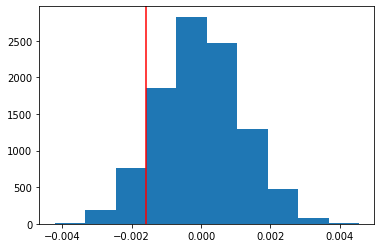

In [30]:
# null hypotheses distrbution
null_values = np.random.normal(0, p_diffs.std(), p_diffs.size)
# null hypotheses histogram
plt.hist(null_values)
#vertical red line to view null for observed difference found above
plt.axvline(x=obs_diff,color ='red');


# p value
print((null_values > obs_diff).mean())

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Since Type I error rate is 5%. the probablity of new page conversion is higher than old page.**
**Regarding P Value, Our observation shows that null hypotheses are almost the right decision.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page == "old_page"').user_id.nunique()
convert_new = df2.query('converted == 1 and landing_page == "new_page"').user_id.nunique(
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique() 
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique() 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
stat, pval = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
stat, pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since "stat" or the zscore value is less than our observed difference, null hypotheses stands. new and old page converted rate are equal to each other so there is no difference. Since then, they do agree with the findings in par j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since we are dealing with categorical variables, we will use Logistic Regression.
Logistic Regression used to perform a regression for categorical variables. But it needs to be converted to dummy variables (0,1) to get the outcome correctly.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# Intercept column needs to be created at the begining to take the intercept value.
df2['intercept'] = 1

In [40]:
# create dummy variables of landing page new or old
df2[['new','old']] = pd.get_dummies(df['landing_page'])

#check results
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new,old
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [41]:
# create ab_page column when individual receives treatment as 1, and 0 if control group.
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']

#check results
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new,old,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
# using Logit function to model our stats. Logit used for Logistic Regression only.
model = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

#fit model
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
# print the summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:52:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**As shown in summary above, the P value associated with ab_page is 0.190. The null hypothesis in part II says there is no difference between control and treatment groups, as shown above. Alternative should show the difference between the two groups.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In my opinion, an important factor we missed, timestamp (date/time) column as an explanatory to determine the linear regression. By using it, we can determine conversion rate based on weekday/weekend/month/day/etc.
As a disadvantage of adding additional terms into my regression model, this would make interruption model more complicated.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
#check result
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new,old,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [47]:
# print unique values in country column
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [50]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

# check result
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new,old,ab_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [51]:
# drop one column of dummy variables created above. To make the regression fully ranked. 
# Since US is a country and UK is a country, we should drop CA since it is a state in US not a country, so CA is our baseline.
df_new = df_new.drop(['CA'], axis=1)

# check result
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new,old,ab_page,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,1,0


In [54]:
# print model summary using Logit. Since CA is our baseline we will not consider it in the model below.
model = sm.Logit(df_new['converted'], df_new[['intercept','new','UK','US']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        23:25:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new           -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

#### Results : 
- For each new page decrease, conversion will happen by 1.5%.
- For each UK increase, conversion will happen by 5%. 
- For each US increase, conversion will happen by 4.9%.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
### Fit Your Linear Model And Obtain the Results
#intersection among US and UK.
df_new['UK_new'] = df_new['new']* df_new['UK']
df_new['US_new'] = df_new['new']* df_new['US']

# check result
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new,old,ab_page,UK,US,UK_new,US_new
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,1,0,1,0


In [56]:
# logistic regression for the intersection above using Logit
model = sm.Logit(df_new['converted'], df_new[['intercept','new','UK_new','US_new','UK','US']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        23:35:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new           -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_new         0.0783      0.057      1.378      0.168      -0.033       0.190
US_new         0.0469      0.054      0.872      0.383      -0.059       0.152
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
==============================================================================
"""

#### Results
- As shown on the model above, we can see the coefficient of intersected (UK_new and US_new) values are different from new page coefficient. Based on that: 
- For each new page decrease, the conversion will happen by 6.7%.
- Conversion for UK_new users will happen by 7.8% more than US_new users.
- Conversion for US_new users will happen by 4.6% more than UK_new users.
- Conversion for UK users will happen by 1.18% more than US users.
- Conversion for US users will happen by 1.75% more than UK users.

#### As part of Logistic Regression we should peform Confusion Matrix, Recall Score, Precision Score and Accuracy_Score  to see if we can take landing page and country to predict conversion rate. 

In [58]:
# We need to import the following libariries in order to calculate the needed values easier
# Reference: Logistic Regression Lesson.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [60]:
# define x, y variables
x = df_new[['new','UK_new','US_new','UK','US']]
y = df_new['converted']

# create test and train data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [61]:
# Confusion Matrix Calculation
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[51094,     0],
       [ 7023,     0]], dtype=int64)

In [64]:
# Recall, Accuracy and Precision scores
print(precision_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.0
0.8791575614708261
0.0


#### Result: 
- 51094 actual conversion predicts user converts. (actual:+ predicted:+)
- 0 actual no conversion predicts user converts . (actual:- predicted:+)
- 7023 predicted no conversion actually converts. (actual:+ predicted:-)
- 0 predicted no conversion did not convert. (actual:- predicted:-)

- Since our accuracy is near to be 1, thats a sign of correctly converted cases, among predicted and test data. 
- Recall and Precision equal to 0, that means we are only converted users are counted. 

<a id='conclusions'></a>
## Conclusions

At the end of this project, i would like to say i have learned alot regarding how to predict decisions based on given data. In addition this can be done through out probability, A/B testing  and Regression. This project tought me based on statistical analysis, we can say if we should go to the required change or not. This should add a huge value in terms of decision making.